In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from imblearn.combine import SMOTEENN #synthetic minority over-sampling technique,edited nearest neighbors
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df['quality'].value_counts() #a total of 6 classes

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
df_normalized=df.iloc[:,0:-1].copy()
for column in df_normalized.columns:
    df_normalized[column]=(df_normalized[column]-df_normalized[column].min())/(df_normalized[column].max()-df_normalized[column].min())

In [10]:
df_normalized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


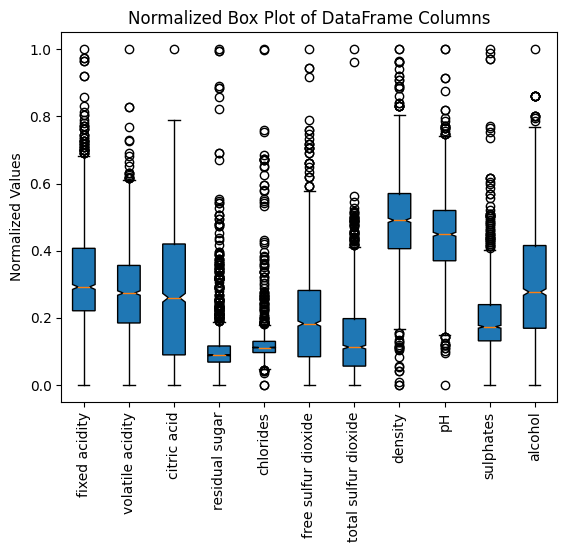

In [11]:
fig, ax = plt.subplots()
bp = ax.boxplot(df_normalized, notch=True, patch_artist=True, meanline=True)
ax.set_xticklabels(df_normalized.columns, rotation=90)
plt.title('Normalized Box Plot of DataFrame Columns')
plt.ylabel('Normalized Values')
plt.show()

In [12]:
for column in df.columns[:-1]:  #removing outliers in original data frame
    q1=np.quantile(df[column],0.25)
    q3=np.quantile(df[column],0.75)
    iqr=q3-q1
    df=df[(df[column]<=(q3+1.5*iqr)) & (df[column]>=(q1-1.5*iqr))]

In [13]:
df.shape

(1135, 12)

In [14]:
df['quality'].value_counts()

5    490
6    472
7    130
4     32
8      9
3      2
Name: quality, dtype: int64

In [15]:
df_normalized=df.iloc[:,0:-1].copy()
for column in df_normalized.columns:
    df_normalized[column]=(df_normalized[column]-df_normalized[column].min())/(df_normalized[column].max()-df_normalized[column].min())

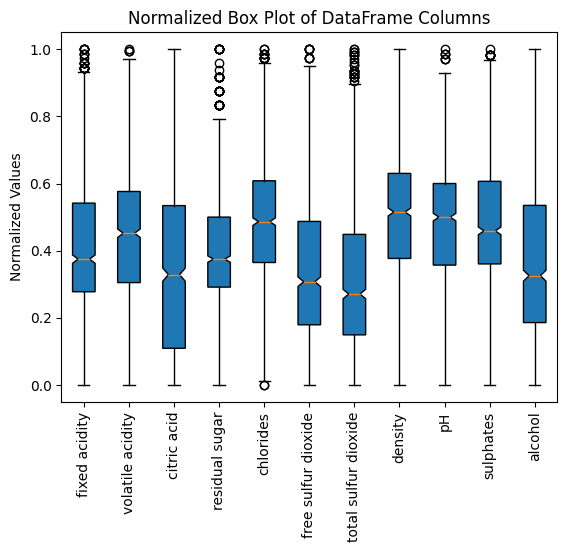

In [16]:
fig, ax = plt.subplots()
bp = ax.boxplot(df_normalized, notch=True, patch_artist=True, meanline=True)
ax.set_xticklabels(df_normalized.columns, rotation=90)
plt.title('Normalized Box Plot of DataFrame Columns')
plt.ylabel('Normalized Values')
plt.show()

Text(0.5, 1.0, 'Red Wine Quality Distribution')

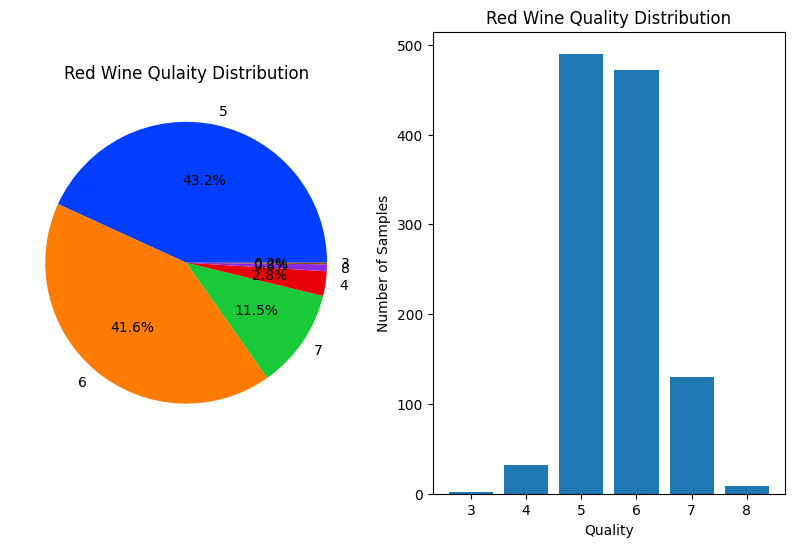

In [20]:
fig=plt.figure(figsize=(10,6))
grid=plt.GridSpec(1,2,hspace=0.5,wspace=0.2)
plt.subplot(grid[0,0])
colors = sns.color_palette('bright',6)
plt.pie(x=df.quality.value_counts(),colors=colors,labels=df.quality.value_counts().index,autopct='%1.1f%%');
plt.title('Red Wine Qulaity Distribution')
plt.subplot(grid[0,1])
plt.bar(df.quality.value_counts().index,df.quality.value_counts())
plt.xlabel('Quality')
plt.ylabel('Number of Samples')
plt.title('Red Wine Quality Distribution')

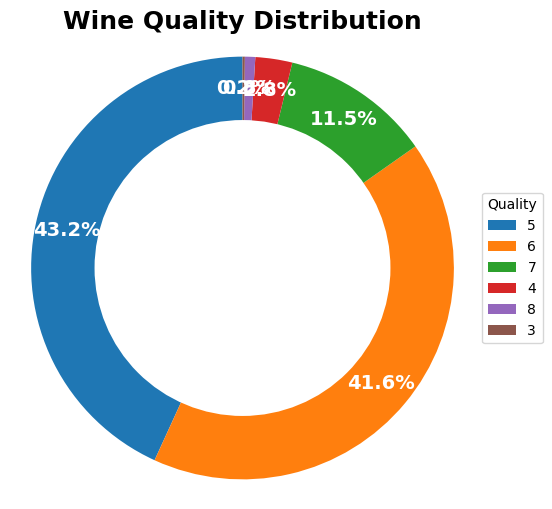

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
counts = df['quality'].value_counts()
wedges, texts, autotexts = ax.pie(counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops=dict(color="w"))
ax.legend(wedges, counts.index, title="Quality", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=14, weight="bold")
ax.set_title("Wine Quality Distribution", fontsize=18, fontweight='bold')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.show()

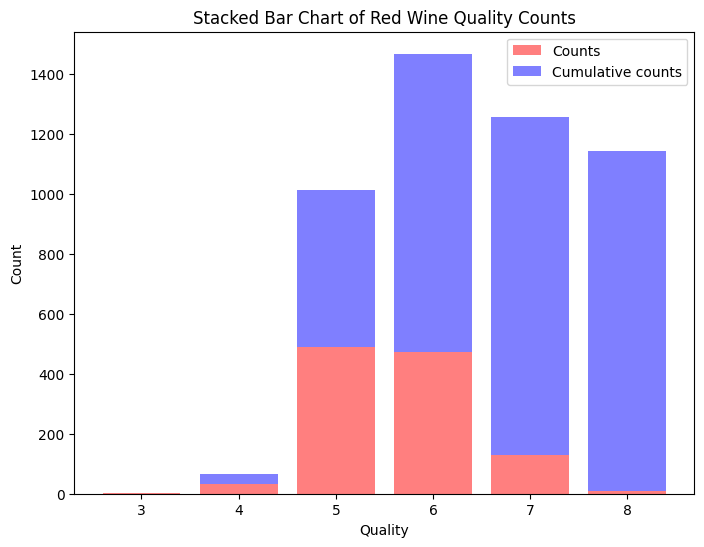

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
categories = ['3', '4', '5', '6', '7', '8']
counts = []
for cat in categories:
    count = df[df['quality'] == int(cat)]['quality'].count()
    counts.append(count)

# Compute the cumulative sums
cumsums = []
for i in range(len(categories)):
    cumsums.append(sum(counts[:i+1]))
ax.bar(categories, counts, bottom=0, color='r', alpha=0.5, label='Counts')
ax.bar(categories, cumsums, bottom=counts, color='b', alpha=0.5, label='Cumulative counts')
ax.set_xlabel('Quality')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Chart of Red Wine Quality Counts')
ax.legend()
plt.show()

In [ ]:
corr=df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.269133,0.659201,0.226868,0.168894,-0.168601,-0.091282,0.597415,-0.692961,0.160282,-0.011738,0.130647
volatile acidity,-0.269133,1.000000,-0.633684,0.028325,0.120929,-0.002098,0.091410,0.059705,0.224428,-0.337451,-0.247386,-0.365390
citric acid,0.659201,-0.633684,1.000000,0.151078,0.063009,-0.095014,-0.014289,0.291809,-0.475585,0.264897,0.168657,0.239435
residual sugar,0.226868,0.028325,0.151078,1.000000,0.235123,0.081341,0.175609,0.388476,-0.043130,0.048965,0.126587,0.041729
chlorides,0.168894,0.120929,0.063009,0.235123,1.000000,0.014543,0.192909,0.395286,-0.151296,-0.095866,-0.285840,-0.178778
free sulfur dioxide,-0.168601,-0.002098,-0.095014,0.081341,0.014543,1.000000,0.635157,-0.027314,0.160725,0.116513,-0.011702,-0.003130
total sulfur dioxide,-0.091282,0.091410,-0.014289,0.175609,0.192909,0.635157,1.000000,0.160564,0.032302,-0.057296,-0.247777,-0.189932
density,0.597415,0.059705,0.291809,0.388476,0.395286,-0.027314,0.160564,1.000000,-0.217487,0.054299,-0.527837,-0.206228
pH,-0.692961,0.224428,-0.475585,-0.043130,-0.151296,0.160725,0.032302,-0.217487,1.000000,-0.006881,0.097760,-0.088971
sulphates,0.160282,-0.337451,0.264897,0.048965,-0.095866,0.116513,-0.057296,0.054299,-0.006881,1.000000,0.281237,0.434908


<Axes: >

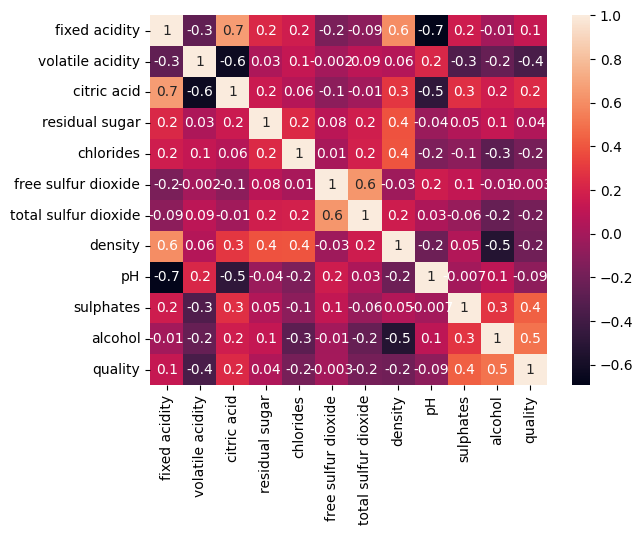

In [24]:
sns.heatmap(df.corr(),annot=True,fmt='.1g')

In [26]:
df_final=pd.concat([df_normalized,df.iloc[:,-1]],axis=1)
df_final.shape

(1135, 12)

In [27]:
df_final.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.319444,0.655367,0.000000,0.291667,0.459459,0.256410,0.261682,0.668367,0.757143,0.377049,0.162791,5
1,0.375000,0.858757,0.000000,0.583333,0.756757,0.615385,0.570093,0.540816,0.314286,0.573770,0.255814,5
2,0.375000,0.723164,0.054795,0.458333,0.675676,0.358974,0.448598,0.566327,0.400000,0.524590,0.255814,5
3,0.847222,0.180791,0.767123,0.291667,0.445946,0.410256,0.504673,0.693878,0.257143,0.409836,0.255814,6
4,0.319444,0.655367,0.000000,0.291667,0.459459,0.256410,0.261682,0.668367,0.757143,0.377049,0.162791,5


In [29]:
sns.pairplot(df_final,hue='quality')

Output hidden; open in https://colab.research.google.com to view.

In [30]:
df_quality=df_normalized.groupby(df.quality)

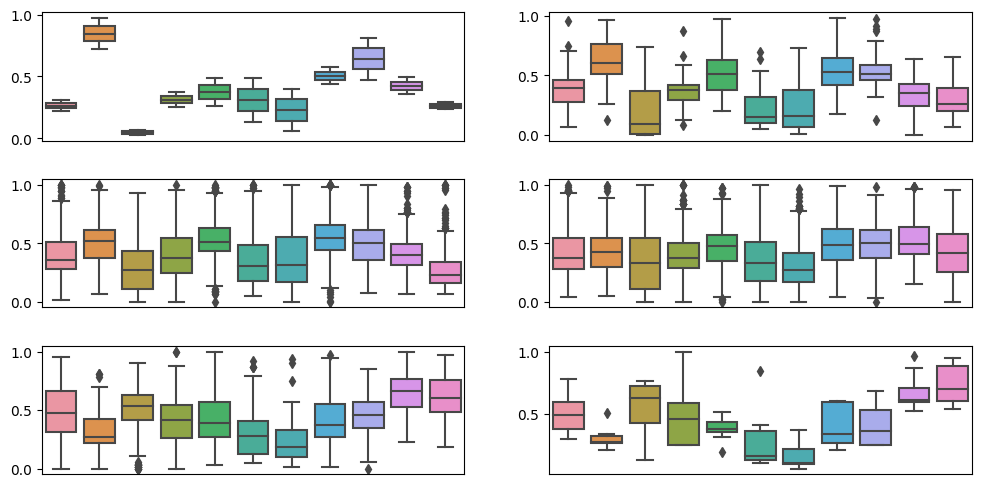

In [31]:
fig=plt.figure(figsize=(12,6))
grid=plt.GridSpec(3,2,hspace=0.3,wspace=0.2)
for i in range(3):
    for j in range(2):
        plt.subplot(grid[i,j])
        ax=sns.boxplot(data=df_quality.get_group(2*i+j+3))
        ax.set_xticks([])

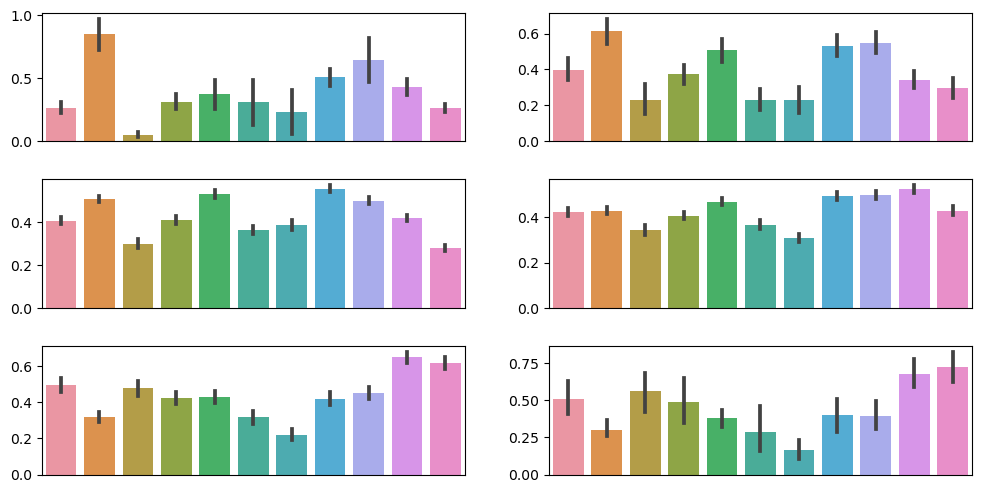

In [ ]:
fig=plt.figure(figsize=(12,6))
grid=plt.GridSpec(3,2,hspace=0.3,wspace=0.2)
for i in range(3):
    for j in range(2):
        plt.subplot(grid[i,j])
        ax=sns.barplot(data=df_quality.get_group(2*i+j+3))
        ax.set_xticks([])

In [32]:
mid_or_extreme=[]
for i in df['quality']:
    if(i==5 or i==6):
        mid_or_extreme.append(1)
    else:
        mid_or_extreme.append(0)
df['mid_or_extreme']=mid_or_extreme           

In [33]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,mid_or_extreme
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [34]:
df['mid_or_extreme'].value_counts()

1    962
0    173
Name: mid_or_extreme, dtype: int64

In [35]:
df_midext=df_normalized.groupby(df['mid_or_extreme'])

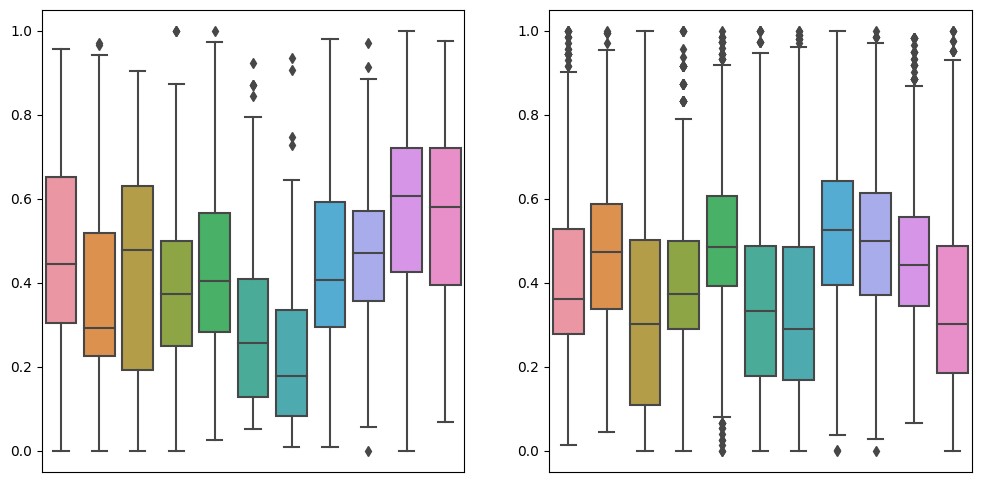

In [36]:
fig=plt.figure(figsize=(12,6))
grid=plt.GridSpec(1,2,hspace=0.3,wspace=0.2)
for i in range(1):
    for j in range(2):
        plt.subplot(grid[i,j])
        ax=sns.boxplot(data=df_midext.get_group(j))
        ax.set_xticks([])

<BarContainer object of 2 artists>

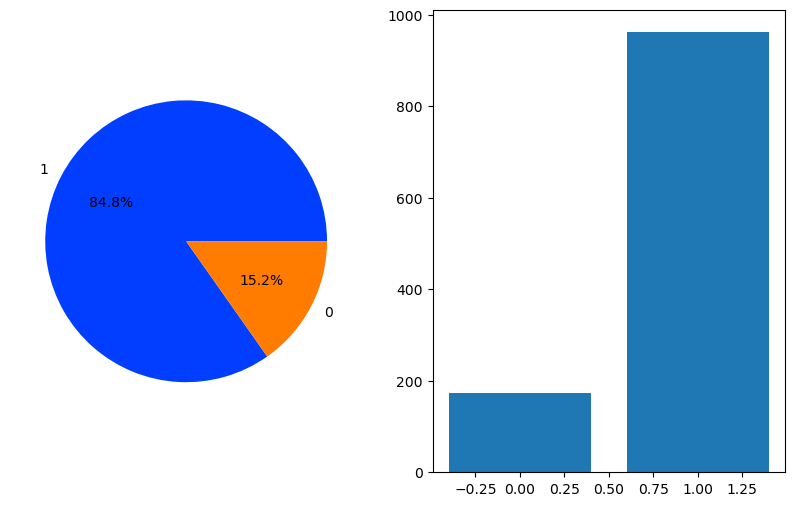

In [ ]:
fig=plt.figure(figsize=(10,6))
grid=plt.GridSpec(1,2,hspace=0.5,wspace=0.2)
plt.subplot(grid[0,0])
colors = sns.color_palette('bright',6)
plt.pie(x=df['mid_or_extreme'].value_counts(),colors=colors,labels=df['mid_or_extreme'].value_counts().index,autopct='%1.1f%%');
plt.subplot(grid[0,1])
plt.bar(df['mid_or_extreme'].value_counts().index,df['mid_or_extreme'].value_counts())

In [37]:
x=df.iloc[:,:-2]
y=df.iloc[:,-1]

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=5)

In [39]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [40]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [41]:
ypred=model.predict(xtest)

<Axes: >

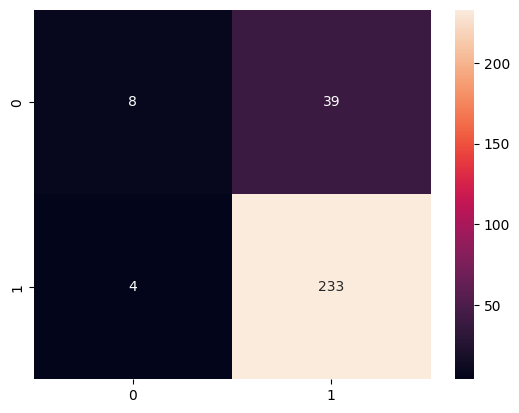

In [42]:
cm=confusion_matrix(ytest,ypred,labels=[0,1])
sns.heatmap(cm,annot=True,fmt='g')

In [ ]:
print(accuracy_score(ytest,ypred))
print(f1_score(ytest,ypred))

0.8485915492957746
0.9155206286836934


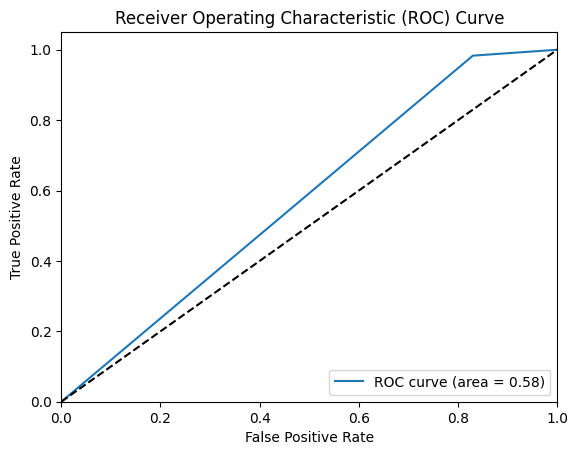

In [43]:
fpr, tpr, thresholds = roc_curve(ytest, ypred)
roc_auc = auc(fpr, tpr) #area under graph

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')#reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [44]:
#undersampling
dfu=df[df['mid_or_extreme']==1].head((df['mid_or_extreme']==0).sum())
dfu2=df[df['mid_or_extreme']==0]
df_under=pd.concat([dfu2,dfu])
df_under=df_under.sample(frac=1).reset_index(drop=True)
df_under.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,mid_or_extreme
0,7.2,0.360,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,7,0
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,5,1
2,9.7,0.320,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.6,5,1
3,7.9,0.650,0.01,2.5,0.078,17.0,38.0,0.99630,3.34,0.74,11.7,7,0
4,8.3,0.845,0.01,2.2,0.070,5.0,14.0,0.99670,3.32,0.58,11.0,4,0


In [45]:
df_under.shape

(346, 13)

In [46]:
df_under['mid_or_extreme'].value_counts()

0    173
1    173
Name: mid_or_extreme, dtype: int64

In [47]:
x=df_under.iloc[:,:-2]
y=df_under.iloc[:,-1]

In [48]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)

In [49]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [50]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [51]:
ypred=model.predict(xtest)

<Axes: >

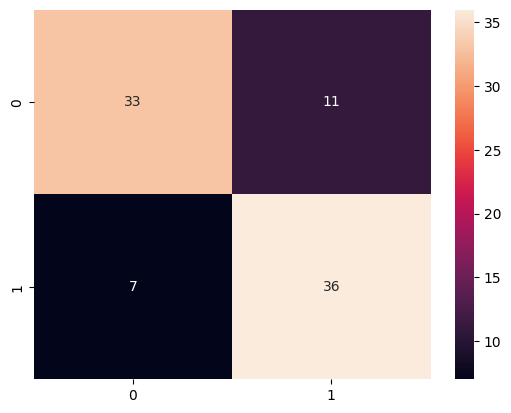

In [52]:
cm=confusion_matrix(ytest,ypred,labels=[0,1])
sns.heatmap(cm,annot=True,fmt='g')

In [53]:
print(accuracy_score(ytest,ypred))
print(f1_score(ytest,ypred))

0.7931034482758621
0.8


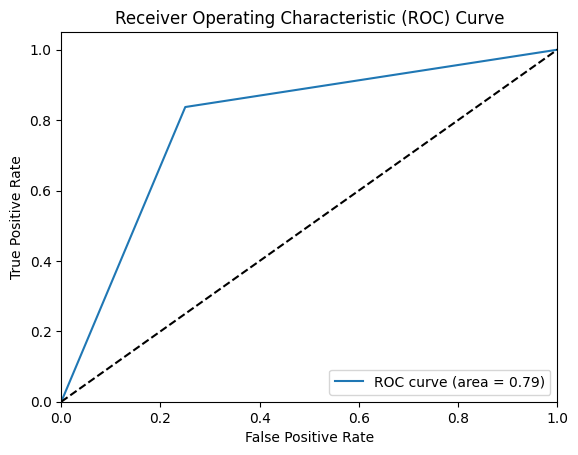

In [54]:
fpr, tpr, thresholds = roc_curve(ytest, ypred)
roc_auc = auc(fpr, tpr) #area under graph

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')#reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [55]:
#oversampling
dfo=df[df['mid_or_extreme']==0]
dfo2= resample(dfo, replace=True, n_samples=(df['mid_or_extreme']==1).sum(), random_state=4)
df_over=pd.concat([dfo2,df[df['mid_or_extreme']==1]])

In [56]:
df_over.shape

(1924, 13)

In [57]:
df_over['mid_or_extreme'].value_counts()

0    962
1    962
Name: mid_or_extreme, dtype: int64

In [58]:
x=df_over.iloc[:,:-2]
y=df_over.iloc[:,-1]

In [59]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=5)

In [60]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [61]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [62]:
ypred=model.predict(xtest)

<Axes: >

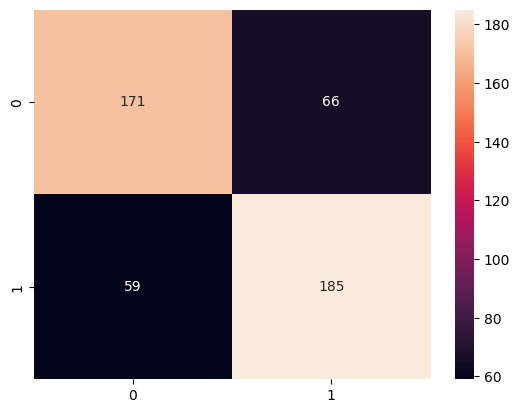

In [63]:
cm=confusion_matrix(ytest,ypred,labels=[0,1])
sns.heatmap(cm,annot=True,fmt='g')

In [64]:
print(accuracy_score(ytest,ypred))
print(f1_score(ytest,ypred))

0.7401247401247402
0.7474747474747474


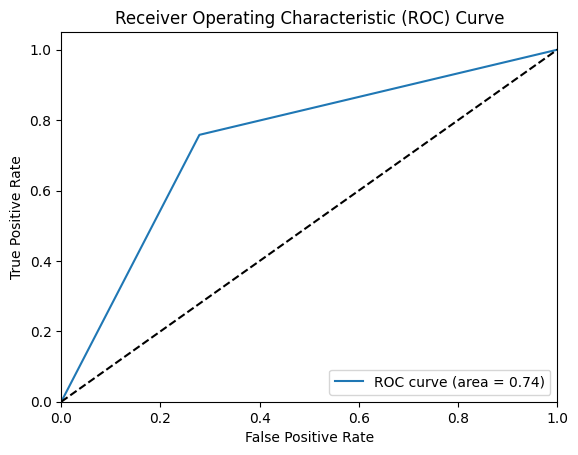

In [65]:
fpr, tpr, thresholds = roc_curve(ytest, ypred)
roc_auc = auc(fpr, tpr) #area under graph

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')#reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [66]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
import imblearn

In [68]:
x=df.iloc[:,:-2]
y=df.iloc[:,-1]

In [69]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=5)

In [70]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [71]:
hybrid_sampling = SMOTEENN(sampling_strategy='auto') #can give ratio class data instead of auto

xresampled, yresampled = hybrid_sampling.fit_resample(xtrain, ytrain)

under_sampler = RandomUnderSampler(sampling_strategy=0.9)
xresampled, yresampled = under_sampler.fit_resample(xresampled, yresampled)

In [72]:
sc=StandardScaler()
xresampled=sc.fit_transform(xresampled)
xtest=sc.transform(xtest)

In [73]:
model=LogisticRegression()
model.fit(xresampled,yresampled)

LogisticRegression()

In [74]:
yhpred=model.predict(xtest)

<Axes: >

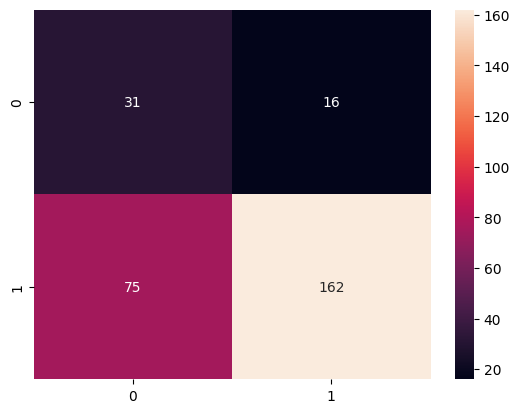

In [75]:
cm=confusion_matrix(ytest,yhpred,labels=[0,1])
sns.heatmap(cm,annot=True,fmt='g')

In [76]:
print(accuracy_score(ytest,yhpred))
print(f1_score(ytest,yhpred))

0.6795774647887324
0.7807228915662652


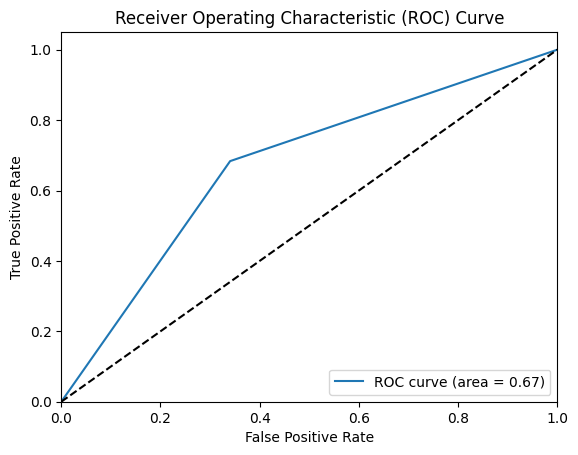

In [77]:
fpr, tpr, thresholds = roc_curve(ytest, yhpred)
roc_auc = auc(fpr, tpr) #area under graph

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')#reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [78]:
df_final.shape

(1135, 12)

In [79]:
df_final.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [80]:
df_final['quality'].value_counts()

5    490
6    472
7    130
4     32
8      9
3      2
Name: quality, dtype: int64

In [81]:
datf=df_final.copy()
mid_or_extreme=[]
for i in df_final['quality']:
    if(i==5 or i==6):
        mid_or_extreme.append(1)
    else:
        mid_or_extreme.append(0)
datf['mid_or_extreme']=mid_or_extreme           

In [82]:
datf['quality'].value_counts()

5    490
6    472
7    130
4     32
8      9
3      2
Name: quality, dtype: int64

In [83]:
x=datf.drop('quality',axis=1)
y=datf['quality']

In [84]:
datf['quality'].value_counts()

5    490
6    472
7    130
4     32
8      9
3      2
Name: quality, dtype: int64

In [85]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=5)

In [86]:
classes=[3,4,5,6,7,8]
model = MultinomialNB()
model.fit(xtrain, ytrain)

MultinomialNB()

In [88]:
ypred=model.predict(xtest)
ypred #should get 6 different classes

array([5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5,
       5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5,
       6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6,
       6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5,
       5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 7, 5, 6, 5, 5, 6, 6, 5, 5,
       5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6])

In [89]:
print(accuracy_score(ytest,ypred))

0.5633802816901409


<Axes: >

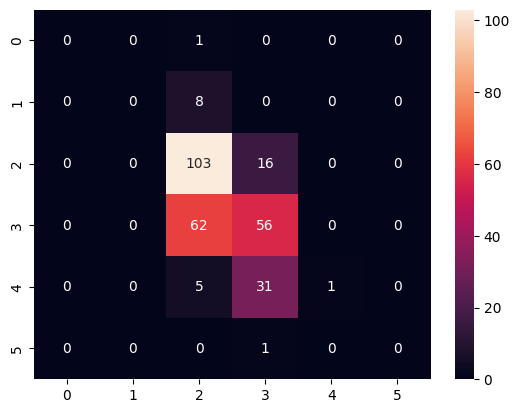

In [90]:
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True,fmt='g')

In [91]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.58      0.87      0.69       119
           6       0.54      0.47      0.50       118
           7       1.00      0.03      0.05        37
           8       0.00      0.00      0.00         1

    accuracy                           0.56       284
   macro avg       0.35      0.23      0.21       284
weighted avg       0.60      0.56      0.51       284



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
x=datf.drop('quality',axis=1)
y=datf['quality']

In [94]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=5)

In [95]:
model = KNeighborsClassifier()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [96]:
print(accuracy_score(ytest,ypred))

0.7077464788732394


<Axes: >

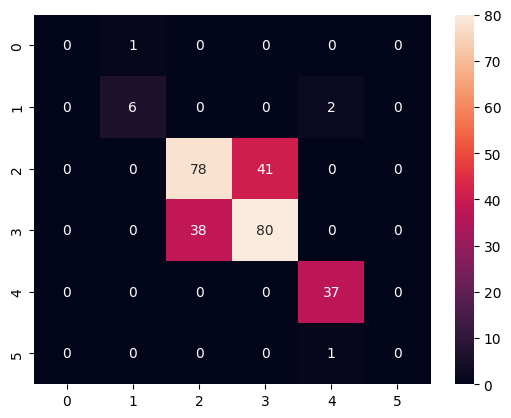

In [97]:
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True,fmt='g')

In [98]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.86      0.75      0.80         8
           5       0.67      0.66      0.66       119
           6       0.66      0.68      0.67       118
           7       0.93      1.00      0.96        37
           8       0.00      0.00      0.00         1

    accuracy                           0.71       284
   macro avg       0.52      0.51      0.52       284
weighted avg       0.70      0.71      0.70       284



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [99]:
x=datf.drop('quality',axis=1)
y=datf['quality']

In [100]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=5)

In [101]:
model= DecisionTreeClassifier(criterion="entropy",random_state=5)
#,max_depth=3, min_samples_leaf=5
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=5)

In [102]:
ypred=model.predict(xtest)

In [103]:
print(accuracy_score(ytest,ypred))

0.704225352112676


<Axes: >

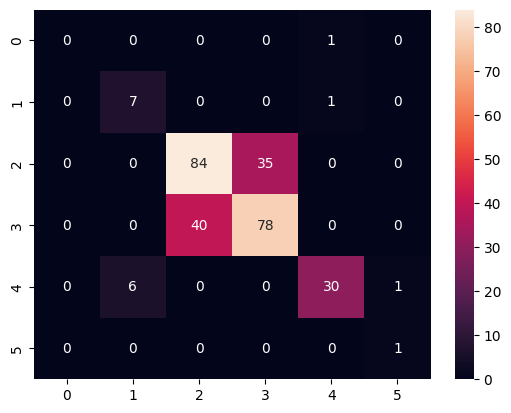

In [104]:
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True,fmt='g')

In [105]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.54      0.88      0.67         8
           5       0.68      0.71      0.69       119
           6       0.69      0.66      0.68       118
           7       0.94      0.81      0.87        37
           8       0.50      1.00      0.67         1

    accuracy                           0.70       284
   macro avg       0.56      0.68      0.59       284
weighted avg       0.71      0.70      0.70       284



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
x=datf.drop('quality',axis=1)
y=datf['quality']

In [107]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=5)

In [108]:
model=SVC(kernel='linear') 
model.fit(xtrain, ytrain)

SVC(kernel='linear')

In [109]:
ypred=model.predict(xtest)

In [110]:
print(accuracy_score(ytest,ypred))

0.721830985915493


<Axes: >

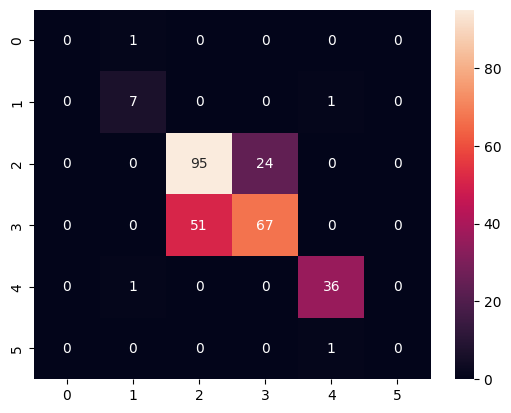

In [111]:
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True,fmt='g')

In [112]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.78      0.88      0.82         8
           5       0.65      0.80      0.72       119
           6       0.74      0.57      0.64       118
           7       0.95      0.97      0.96        37
           8       0.00      0.00      0.00         1

    accuracy                           0.72       284
   macro avg       0.52      0.54      0.52       284
weighted avg       0.72      0.72      0.72       284



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
x=datf.drop('quality',axis=1)
y=datf['quality']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=5)

In [114]:
pca = PCA(n_components = 3)
 
xtrain = pca.fit_transform(xtrain)
xtest = pca.transform(xtest)
 
explained_variance = pca.explained_variance_ratio_

In [115]:
model=SVC(kernel='linear') 
model.fit(xtrain, ytrain)

ypred=model.predict(xtest)
print(accuracy_score(ytest,ypred))

0.7077464788732394


<Axes: >

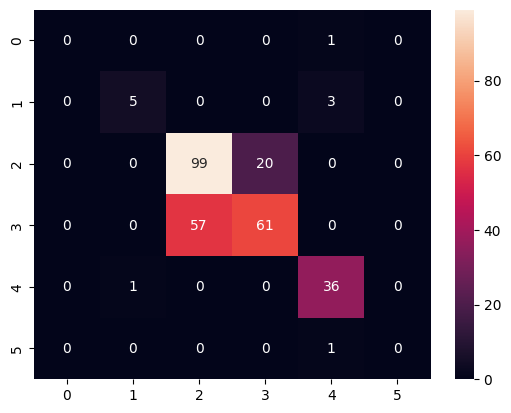

In [116]:
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True,fmt='g')

In [117]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.83      0.62      0.71         8
           5       0.63      0.83      0.72       119
           6       0.75      0.52      0.61       118
           7       0.88      0.97      0.92        37
           8       0.00      0.00      0.00         1

    accuracy                           0.71       284
   macro avg       0.52      0.49      0.50       284
weighted avg       0.72      0.71      0.70       284



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
